In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [2]:
df = pd.read_csv('Table.txt', delimiter='\t')
txt = df.to_latex(index = False, decimal = ',')
print(txt)

\begin{tabular}{rrrrrr}
\toprule
 Longitud (mm) &  Masa 1 (g) &  Masa 2 (g) &  Masa 3 (g) &  Promedio (g) &  Desviacion (g) \\
\midrule
            28 &     0,08194 &     0,08196 &     0,08262 &        0,0822 &          0,0004 \\
            29 &     0,08573 &     0,08673 &     0,08648 &        0,0863 &          0,0005 \\
            30 &     0,09003 &     0,08884 &     0,08970 &        0,0895 &          0,0006 \\
            31 &     0,09270 &     0,09322 &     0,09263 &        0,0928 &          0,0003 \\
            32 &     0,09551 &     0,09536 &     0,09538 &        0,0954 &          0,0001 \\
            33 &     0,09895 &     0,09825 &     0,09870 &        0,0986 &          0,0004 \\
            34 &     0,10172 &     0,10176 &     0,10137 &        0,1016 &          0,0002 \\
            35 &     0,10409 &     0,10318 &     0,10422 &        0,1038 &          0,0006 \\
            36 &     0,10679 &     0,10593 &     0,10757 &        0,1068 &          0,0008 \\
            37 &  

In [3]:
def getVolume(mass, density):
    return mass / density

In [4]:
length, mass, std = np.genfromtxt('Means.txt', skip_header = 1).T

In [5]:
V = 100 # uL
rho = 0.988679

volume = getVolume(mass, rho) * 1000
v_std = volume * (std / mass)

In [6]:
(m, b), cov = np.polyfit(length, volume, 1, cov=True)
dm = cov[0, 0]**0.5
db = cov[1, 1]**0.5

In [7]:
m, dm

(3.048144406461917, 0.05601195913785756)

In [8]:
b, db

(-1.2367282735115677, 1.8568619182752026)

In [9]:
l = (V - b) / m

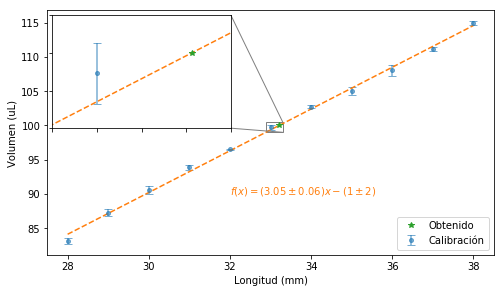

In [10]:
y = m*length + b

fig, ax = plt.subplots(figsize = (8, 4.5))
axins = zoomed_inset_axes(ax, 11, loc = 2) # zoom-factor: 2.5, location: upper-left

for axis in (ax, axins):
    axis.errorbar(length, volume, yerr = v_std, fmt = 'o', capthick = 1, ms = 4, alpha = 0.6, capsize = 4, label = 'Calibración')
    c = axis.plot(length, y, '--')[0].get_color()
    axis.plot(l, V, '*', label = 'Obtenido')

ax.text(32, 90, r'$f(x) = (3.05 \pm 0.06)x - (1 \pm 2)$', color = c)

axins.set_xlim(32.9, 33.3) # apply the x-limits
axins.set_ylim(99, 100.5) # apply the y-limits

mark_inset(ax, axins, loc1 = 4, loc2 = 1, fc = "none", ec = "0.5")

plt.yticks(visible=False)
plt.xticks(visible=False)

ax.set_xlabel('Longitud (mm)')
ax.set_ylabel('Volumen (uL)')

ax.legend(loc = 4)

plt.savefig('syringe_cal.png', dpi = 300)
plt.show()